# Aula 4

In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Ex.1 - Inverting the colors of a grayscale image

In [2]:
img = cv2.imread('Figuras4/Fig0304a.tif', cv2.IMREAD_GRAYSCALE)

Height:  571
Width =  482


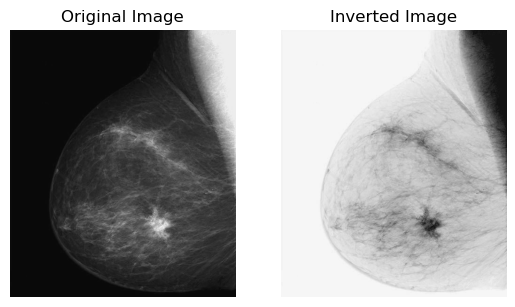

In [7]:
# plt.imshow img and img_inv in a 1x2 grid

(h, w) = img.shape

print('Height: ', h)
print('Width = ', w)

img_inv = np.zeros((h,w), dtype = "uint8")

for i in range(h):
    for j in range(w):

        img_inv[i,j] = 255 - img[i,j]

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_inv, cmap='gray')
plt.title('Inverted Image')
plt.axis('off')

plt.show()


### Important thoughts when working with uint8 variables

In [22]:
print('\nBe careful with operations with uint8 variables, check what happens with the overflow: ')

n8 = np.array([1, 2, 3], dtype='uint8')
print('[1,2,3] * 100 = ' , n8 * 100)
print('[1,2,3] - 3 = ' , n8 - 3)


Be careful with operations with uint8 variables, check what happens with the overflow: 
[1,2,3] * 100 =  [100 200  44]
[1,2,3] - 3 =  [254 255   0]


In [14]:
print('\nIn order to avoid overflow, you must convert the variable to int32: ')
n32 = n8.astype('int32')
print('int32([1,2,3]) * 100 = ' , n32 * 100)
print('int32([1,2,3]) - 3 = ' , n32 - 3)


In order to avoid overflow, you must convert the variable to int32: 
int32([1,2,3]) * 100 =  [100 200 300]
int32([1,2,3]) - 3 =  [-2 -1  0]


In [15]:
print('\nIf you just use astype to go back into uint8, it won\'t work: ')
print('mult.astype(np.uint8) = ', (n32 * 100).astype(np.uint8))
print('sub.astype(np.uint8) = ', (n32 - 3).astype(np.uint8))


If you just use astype to go back into uint8, it won't work: 
mult.astype(np.uint8) =  [100 200  44]
sub.astype(np.uint8) =  [254 255   0]


In [16]:
print('\nYou must use clip to avoid overflow: ')
print('np.clip(soma) = ', np.clip(n32 * 100, 0, 255).astype(np.uint8))
print('np.clip(sub) = ', np.clip(n32 - 3, 0, 255).astype(np.uint8))


You must use clip to avoid overflow: 
np.clip(soma) =  [100 200 255]
np.clip(sub) =  [0 0 0]


## Ex.2 - Changing the saturation and contrast of an image

In [28]:
img2 = cv2.imread('Figuras4/Fig2.tif', cv2.IMREAD_GRAYSCALE)

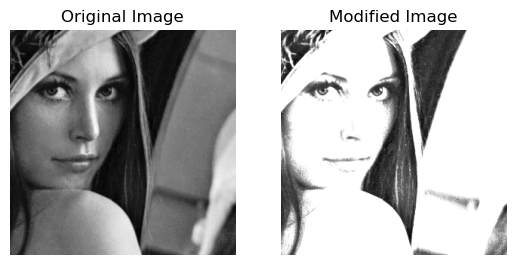

In [32]:
img2_gray32 = img2.astype(np.int32)

(h, w) = img2.shape

img2_out = np.zeros((h,w), dtype = "uint8")

mult = 3
soma = 30

for i in range(h):
    for j in range(w):
        intens32 = img2_gray32[i,j]*mult+soma
        img2_out[i,j] = np.clip(intens32, 0, 255).astype(np.uint8)
        '''
        First, we convert the pixel intensity to int32, then we multiply it by 3 and add 30.
        The result is clipped to the range [0, 255] and converted back to uint8.
        '''

# plt.imshow img and img_inv in a 1x2 grid
plt.subplot(1,2,1)
plt.imshow(img2, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img2_out, cmap='gray')
plt.title('Modified Image')
plt.axis('off')

plt.show()

## Ex.3a - Power-law transformation

In [41]:
img3 = cv2.imread('Figuras4/Fig0305a.tif', cv2.IMREAD_GRAYSCALE)

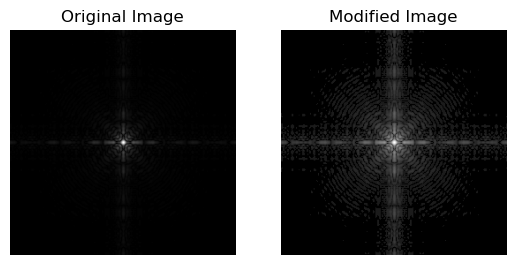

In [89]:
img3_pl = img3/255

(h, w) = img3.shape

img3_out = np.zeros((h,w), dtype = "uint8")

gamma = 0.5

for i in range(h):
    for j in range(w):
        float_img = img3_pl[i,j]**gamma
        float_img = float_img*255
        img3_out[i,j] = float_img

plt.subplot(1,2,1)
plt.imshow(img3, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img3_out, cmap='gray')
plt.title('Modified Image')
plt.axis('off')

plt.show()

## Ex.3b - Power-law transformation

In [45]:
img3b = cv2.imread('Figuras4/Fig0308a.tif', cv2.IMREAD_GRAYSCALE)

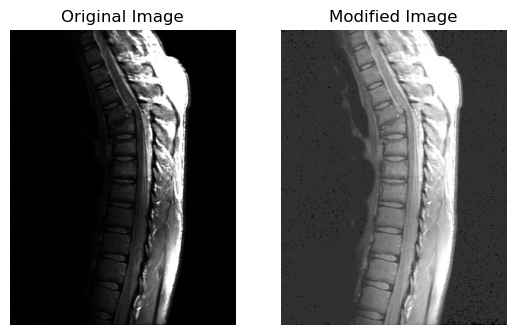

In [60]:
img3b_pl = img3b/255

(h, w) = img3b.shape

img3b_out = np.zeros((h,w), dtype = "uint8")

gamma = 0.3

for i in range(h):
    for j in range(w):
        float_img = img3b_pl[i,j]**gamma
        float_img = float_img*255
        img3b_out[i,j] = float_img

plt.subplot(1,2,1)
plt.imshow(img3b, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img3b_out, cmap='gray')
plt.title('Modified Image')
plt.axis('off')

plt.show()

## Ex.3c - Power-law transformation

In [61]:
img3c = cv2.imread('Figuras4/Fig0309a.tif', cv2.IMREAD_GRAYSCALE)

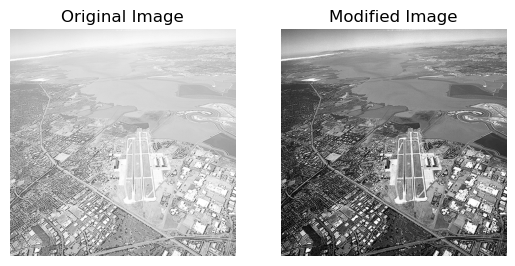

In [70]:
img3c_pl = img3c/255

(h, w) = img3c.shape

img3c_out = np.zeros((h,w), dtype = "uint8")

gamma = 3.5

for i in range(h):
    for j in range(w):
        float_img3c = img3c_pl[i,j]**gamma
        float_img3c = float_img3c*255
        img3c_out[i,j] = float_img3c

plt.subplot(1,2,1)
plt.imshow(img3c, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img3c_out, cmap='gray')
plt.title('Modified Image')
plt.axis('off')

plt.show()

## Ex.4 - Image subtraction

In [79]:
img4a = cv2.imread('Figuras4/Fig4A.png', cv2.IMREAD_GRAYSCALE)
img4b = cv2.imread('Figuras4/Fig4B.png', cv2.IMREAD_GRAYSCALE)

C:\Users\lucca\AppData\Local\Temp\ipykernel_19796\2121922144.py:9: RuntimeWarning: overflow encountered in scalar subtract
  img4_out[i,j] = img4b[i,j] - img4a[i,j]


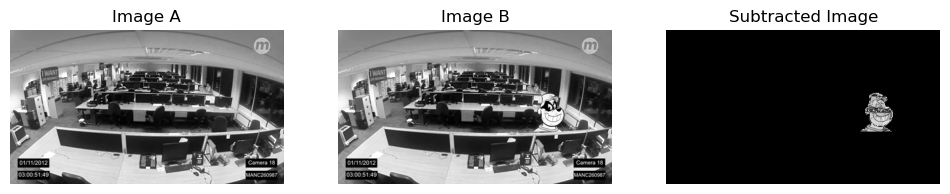

In [86]:
# image subtraction

(h, w) = img4a.shape

img4_out = np.zeros((h,w), dtype = "uint8")

for i in range(h):
    for j in range(w):
        img4_out[i,j] = img4b[i,j] - img4a[i,j]

plt.figure(figsize=(12, 12))  # Adjust the width and height as needed

plt.subplot(1,3,1)
plt.imshow(img4a, cmap='gray')
plt.title('Image A')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img4b, cmap='gray')
plt.title('Image B')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img4_out, cmap='gray')
plt.title('Subtracted Image')
plt.axis('off')

plt.show()

## Ex.5 - Histogram Calculation

In [104]:
img5a = cv2.imread('Figuras4/Fig0316a.tif', cv2.IMREAD_GRAYSCALE)
img5b = cv2.imread('Figuras4/Fig0316b.tif', cv2.IMREAD_GRAYSCALE)
img5c = cv2.imread('Figuras4/Fig0316c.tif', cv2.IMREAD_GRAYSCALE)
img5d = cv2.imread('Figuras4/Fig0316d.tif', cv2.IMREAD_GRAYSCALE)

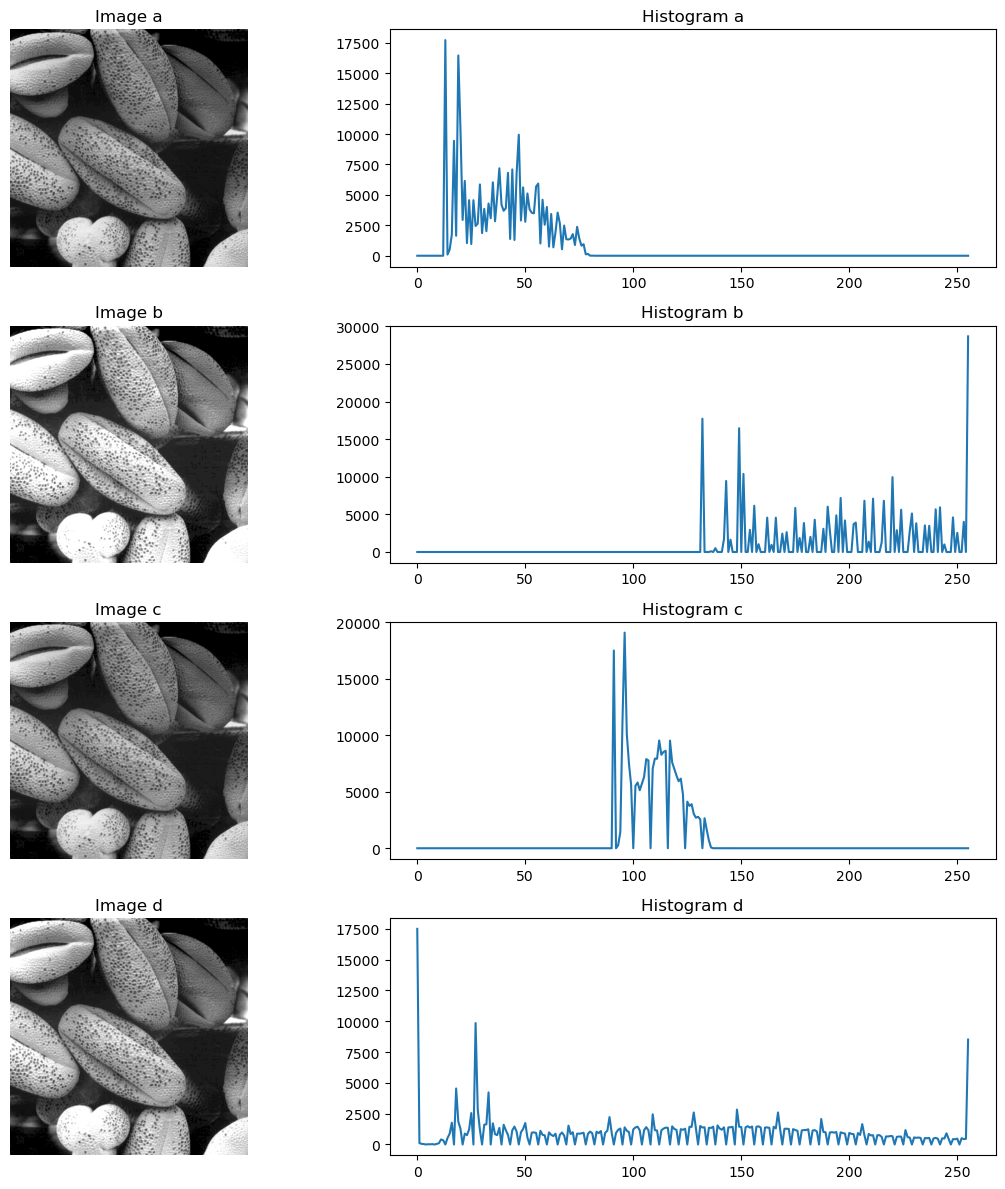

In [105]:
imgs = [img5a, img5b, img5c, img5d]
channels = [0]
maks = None
bins = [256]
ranges = [0, 256]
histograms = [cv2.calcHist([img], channels, maks, bins, ranges) for img in imgs]

# plotting the 4 images, and below then the histograms

plt.figure(figsize=(12, 12))  # Adjust the width and height as needed

for i in range(4):
    plt.subplot(4,2,2*i+1)
    plt.imshow(imgs[i], cmap='gray')
    plt.title('Image ' + chr(97+i))
    plt.axis('off')

    plt.subplot(4,2,2*i+2)
    plt.plot(histograms[i])
    plt.title('Histogram ' + chr(97+i))
    
plt.tight_layout()
plt.show()

### Equalizing the histogram

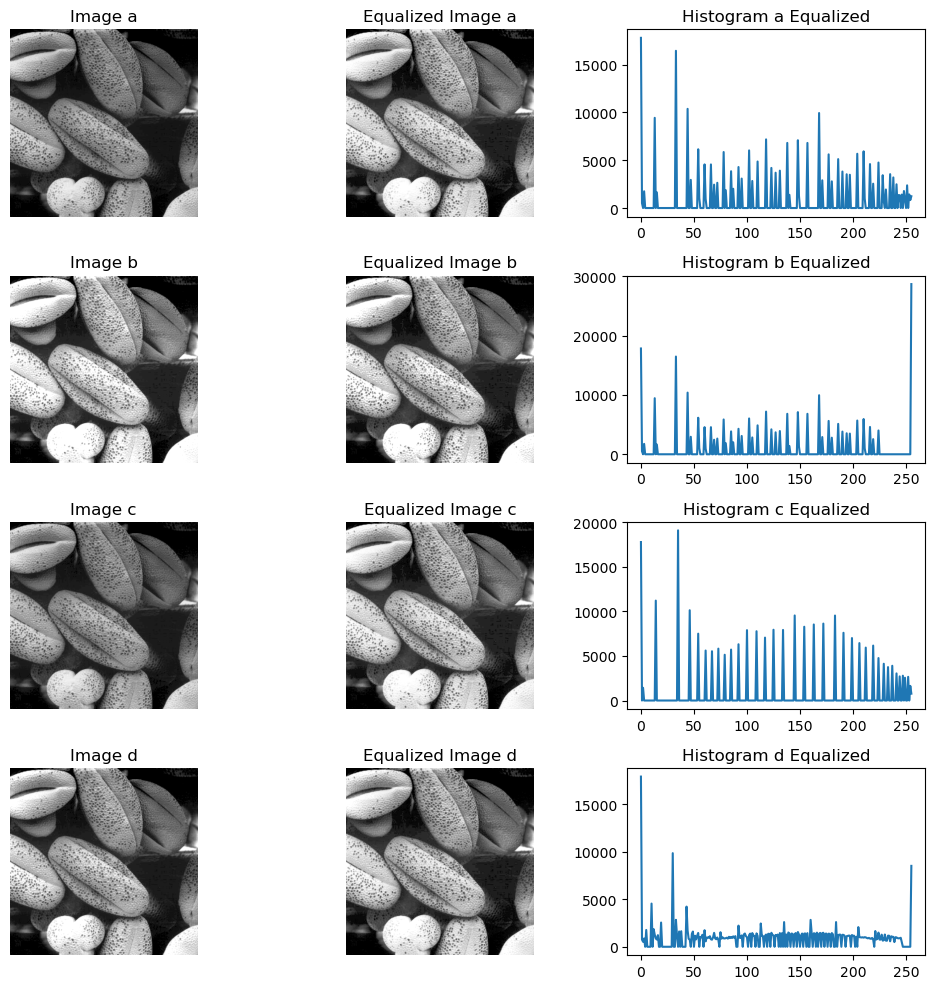

In [106]:
fig5_eq = [cv2.equalizeHist(img) for img in imgs]
histograms_eq = [cv2.calcHist([img], channels, maks, bins, ranges) for img in fig5_eq]

plt.figure(figsize=(10, 10))  # Adjust the width and height as needed
for i in range(4):
    plt.subplot(4,3,3*i+1)
    plt.imshow(imgs[i], cmap='gray')
    plt.title('Image ' + chr(97+i))
    plt.axis('off')

    plt.subplot(4,3,3*i+2)
    plt.imshow(fig5_eq[i], cmap='gray')
    plt.title('Equalized Image ' + chr(97+i))
    plt.axis('off')

    plt.subplot(4,3,3*i+3)
    plt.plot(histograms_eq[i])
    plt.title('Histogram ' + chr(97+i) + ' Equalized')

plt.tight_layout()
plt.show()
